# Size-Analysis
Analyze the size of .nwb files as a function of SUS

Idea: Generate toy-nwb files with just Units and Spike trains, measure size, scatter plot

Conclusion: $size_{MB} = 0.178597 + 0.000238 N_{units}$

In [313]:
from datetime import datetime
from dateutil.tz import tzlocal

import numpy as np
from pynwb import NWBFile, NWBHDF5IO

import os

import numpy as np
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt

In [314]:
def spike_count(nwbfile):
    

def file_size_test(n_units = 2000, duration = 2000):
 
    test_fname = 'tmp_123456qwerty.nwb'
    nwbfile = NWBFile(
        session_description="my first synthetic recording",
        identifier="EXAMPLE_ID",
        session_start_time=datetime.now(tzlocal()),
        experimenter="Dr. Bilbo Baggins",
        lab="Bag End Laboratory",
        institution="University of Middle Earth at the Shire",
        experiment_description="I went on an adventure with thirteen dwarves "
        "to reclaim vast treasures.",
        session_id="LONELYMTN",
    )

    # Add units
    nwbfile.add_unit_column(name="quality", description="sorting quality")

    poisson_lambda = 20
    firing_rate = 10
    n_units = n_units
    duration = duration
    len
    for n_units_per_shank in range(n_units):
        n_spikes = np.random.poisson(lam=poisson_lambda)
        spike_times = np.round(
            np.cumsum(np.random.exponential(duration / firing_rate, n_spikes)), 5
        )
        nwbfile.add_unit(
            spike_times=spike_times, quality="good", waveform_mean=[1.0, 2.0, 3.0, 4.0, 5.0]
        )


    duration = nwbfile.units.spike_times[-1] - nwbfile.units.spike_times[0]
    num_units = len(nwbfile.units)
    msus = num_units * duration / 1e6
    #print(f"MSUS: {msus}")
    #print(f"Duration: {duration}")
    #print(f"num_units: {num_units}")

    with NWBHDF5IO(test_fname, 'w') as wio:
        wio.write(nwbfile)

    file_size = os.path.getsize(test_fname) / (1024**2.)
    os.remove(test_fname)
    
    return msus, file_size, duration

In [254]:
# Get data

N = 64

msus_log = []
size_log = []
duration_log = []

n_units = np.linspace(1000, 2000, N).astype(int)
durations = np.linspace(1000, 2000, N)

for i in tqdm(range(N)):
    msus, size, dur = file_size_test(n_units = n_units[i],
                                    duration = durations[i])
    
    msus_log.append(msus)
    size_log.append(size)
    duration_log.append(dur)
    
    #print(n_units[i], msus, size, dur)

  0%|          | 0/64 [00:00<?, ?it/s]

Size(MB) = 0.178597 + 0.000238 * n_units


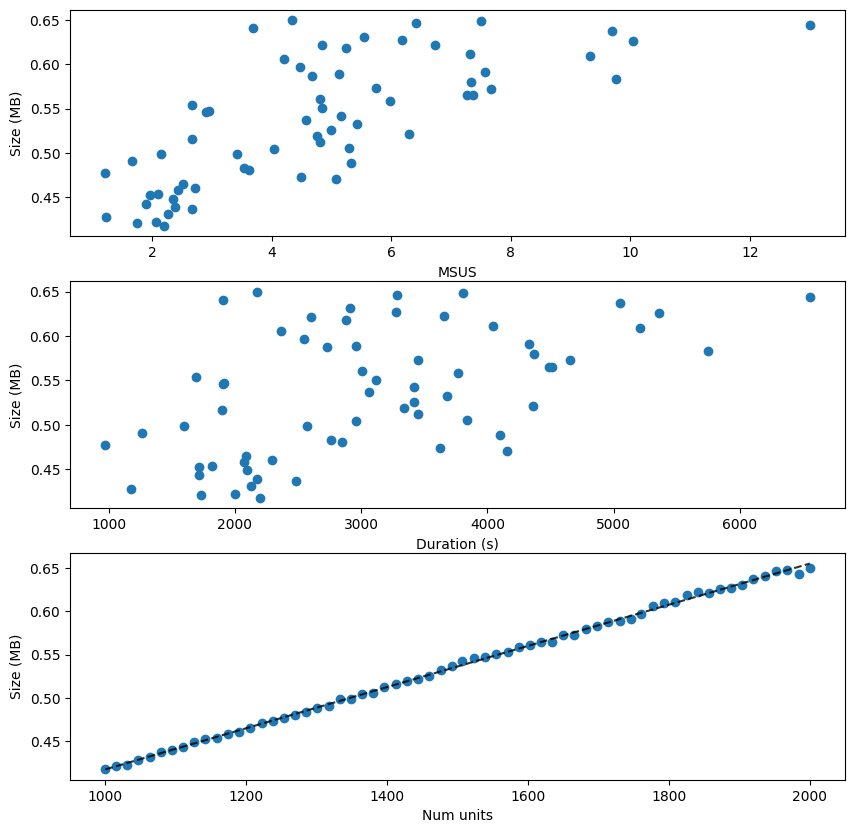

In [315]:
slope, off = np.polyfit(n_units, size_log, deg=1)
print(f"Size(MB) = {off:f} + {slope:f} * n_units")

fig, ax = plt.subplots(3, figsize=(10, 10))

ax[0].scatter(msus_log, size_log)
ax[0].set_xlabel("MSUS")

ax[1].scatter(duration_log, size_log)
ax[1].set_xlabel("Duration (s)")

ax[2].scatter(n_units, size_log)
ax[2].set_xlabel("Num units")
ax[2].plot(n_units, 
           off + slope * np.array(n_units),
           'k--', 
           alpha=0.8)

for a in ax:
    a.set_ylabel("Size (MB)")

## Trying something with real data
Problem: There's so much extra data along with spike times
The extra is data is taking most of the space

In [335]:
import sys

raw_data_fname = "/nethome/varora38/raw-data/000363/sub-440956/sub-440956_ses-20190207T120657_behavior+ecephys+ogen.nwb"
wio.close()
rio.close()

In [336]:
from pynwb import NWBHDF5IO

wio = NWBHDF5IO('test.nwb', 'w')
rio = NWBHDF5IO(raw_data_fname, 'r')
nwb_in = rio.read()

In [345]:
duration = nwb_in.units.spike_times[-1] - nwb_in.units.spike_times[0]
num_units = len(nwb_in.units)
sus = num_units * duration
print(f"MSUS: {sus / 1e6}")
print(f"Duration: {duration}")
print(f"num_units: {num_units}")

sum([sys.getsizeof(x) for x in nwb_in.units])

MSUS: 4.53682506541591
Duration: 2324.193168758151
num_units: 1952


142036762

In [330]:
# Remove unwanted stuff from nwbfile
def empty_dict(d):
    keys = list(d.keys())
    for k in keys:
        del d[k]
        
empty_dict(nwb_in.acquisition)
empty_dict(nwb_in.devices)

type(nwb_in.trials)

pynwb.epoch.TimeIntervals

In [331]:
wio.export(src_io=rio, nwbfile=nwb_in)
wio.close()
rio.close()

In [362]:
i = 1
for k in nwb_in.units[i].keys():
    print(k, sys.getsizeof(nwb_in.units[i][k].iloc[0]), type(nwb_in.units[i][k].iloc[0]))
    
print(len(nwb_in.units[i].spike_times[1]))

unit 28 <class 'numpy.int32'>
sampling_rate 28 <class 'numpy.int32'>
unit_quality 54 <class 'str'>
unit_posx 32 <class 'numpy.float64'>
unit_posy 32 <class 'numpy.float64'>
unit_amp 32 <class 'numpy.float64'>
unit_snr 32 <class 'numpy.float64'>
isi_violation 32 <class 'numpy.float64'>
avg_firing_rate 32 <class 'numpy.float64'>
drift_metric 32 <class 'numpy.float64'>
presence_ratio 32 <class 'numpy.float64'>
amplitude_cutoff 32 <class 'numpy.float64'>
isolation_distance 32 <class 'numpy.float64'>
l_ratio 32 <class 'numpy.float64'>
d_prime 32 <class 'numpy.float64'>
nn_hit_rate 32 <class 'numpy.float64'>
nn_miss_rate 32 <class 'numpy.float64'>
silhouette_score 32 <class 'numpy.float64'>
max_drift 32 <class 'numpy.float64'>
cumulative_drift 32 <class 'numpy.float64'>
duration 32 <class 'numpy.float64'>
halfwidth 32 <class 'numpy.float64'>
pt_ratio 32 <class 'numpy.float64'>
repolarization_slope 32 <class 'numpy.float64'>
recovery_slope 32 <class 'numpy.float64'>
spread 32 <class 'numpy.fl

In [381]:
for unit in nwb_in.units:
    unit['spike_times']

In [383]:
len(nwb_in.units.spike_times) * 8 / (1024**2.)

132.69168090820312